Below here are importing all the libraries required

In [38]:
# Below importing pandas for data exploration and analysis
import pandas as pd
import numpy as np

# Below Libraries for Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Below Library for splitting the data into training and testing data
from sklearn.model_selection import train_test_split,GridSearchCV

# Below Libraries for 2 Machine Learning Model Implementations
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from imblearn.over_sampling import SMOTE


### **Information about the Dataset used**

We have the dataset which contain patients health information with respect to Heart Disease and ifthey are heart disease effectee or not
and in this analysis we will analyze which features are causing the Heart Disease

In [39]:
df_heart_disease=pd.read_csv('data.csv')
df_heart_disease_1 = df_heart_disease.copy()
df_heart_disease.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [40]:
df_heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [41]:
print("Total number of Null Values in each Column: \n")
df_heart_disease.isnull().sum()

Total number of Null Values in each Column: 



male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [42]:
# Looking into the shape of data set how many rows and columns are there --->

print("No of Rows we have : ",df_heart_disease.shape[0])
print("No of Features: ",df_heart_disease.shape[1])

No of Rows we have :  4240
No of Features:  16


In [43]:
# Now dropping those rows which Contains Missing values and then checking the shape of our Dataset
df_heart_disease.dropna(inplace=True)

print("After Data Cleaning i.e Dropping Null Values")

print("No of Rows we have : ",df_heart_disease.shape[0])
print("No of Features: ",df_heart_disease.shape[1])

After Data Cleaning i.e Dropping Null Values
No of Rows we have :  3658
No of Features:  16


In [44]:
# Now Looking into an Descriptive Analysis using the Pandas Describe function

df_heart_disease.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000
mean,0.443685,49.551941,1.980317,0.489065,9.025424,0.030344,0.005741,0.311646,0.027064,236.847731,132.370558,82.917031,25.782802,75.730727,81.852925,0.152269
std,0.496886,8.562029,1.022656,0.499949,11.921590,0.171557,0.075561,0.463229,0.162292,44.097681,22.086866,11.974258,4.065601,11.981525,23.904164,0.359331
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,143.875000,90.000000,28.037500,82.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


**Data Visualization**

**Visualizing useful Insighs from the Data**

Text(0.5, 0, 'Gender')

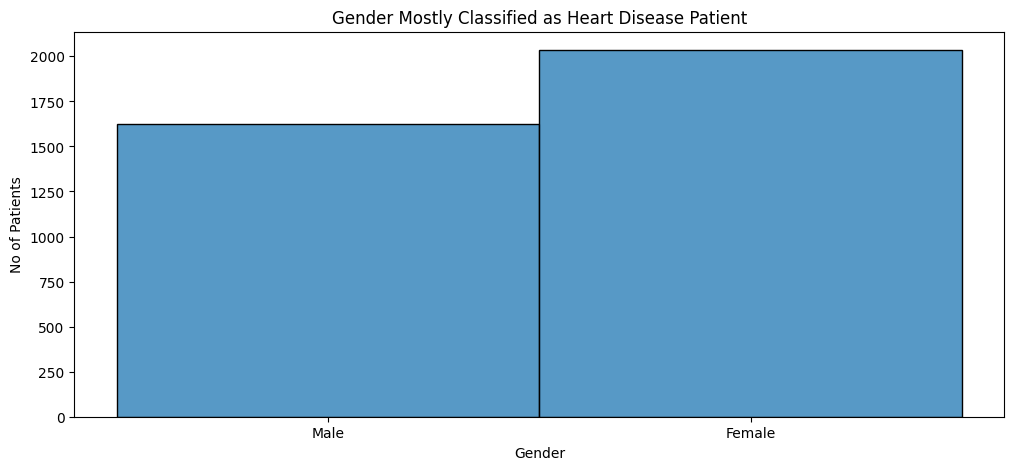

In [45]:
# Firstly lets Look which Gender is mostly classified into HeartDisease 

plt.figure(figsize=(12,5))
plt.title("Gender Mostly Classified as Heart Disease Patient")
sns.histplot(df_heart_disease.male.map({0:"Female",1:"Male"}))
plt.ylabel("No of Patients")
plt.xlabel("Gender")

<Axes: title={'center': 'Age Effected by Disease'}, xlabel='age', ylabel='TenYearCHD'>

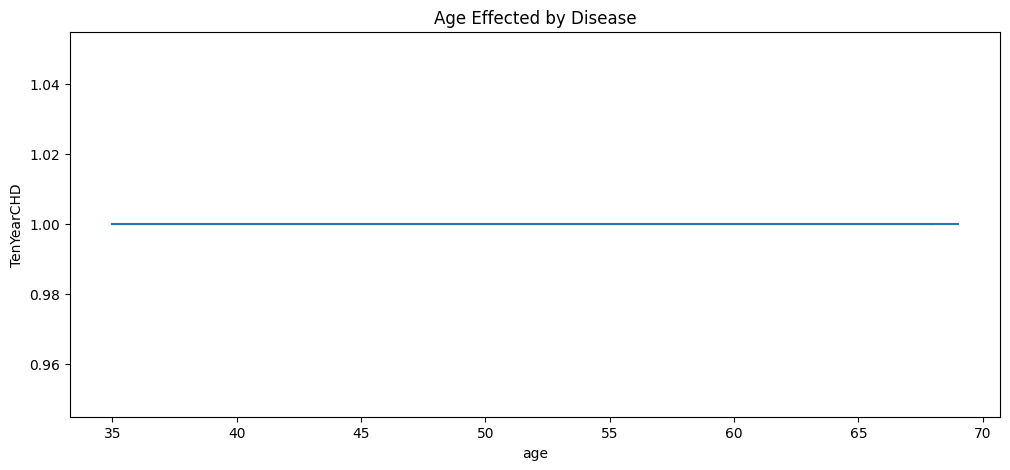

In [46]:
# Now let's see which Age gap is the most effected by the Disease

df_heart_disease = df_heart_disease[df_heart_disease["TenYearCHD"] == 1]

plt.figure(figsize=(12,5))
plt.title("Age Effected by Disease")

sns.lineplot(x=df_heart_disease.age, y = df_heart_disease.TenYearCHD)


Looking on the Above Analysis we can say that people above 35 years of age are likely to have Heart Disease

**Now Let us see that what is the maximum and average BMI, Glucose and heart rate of Patients classified as Heart Disease Patients**

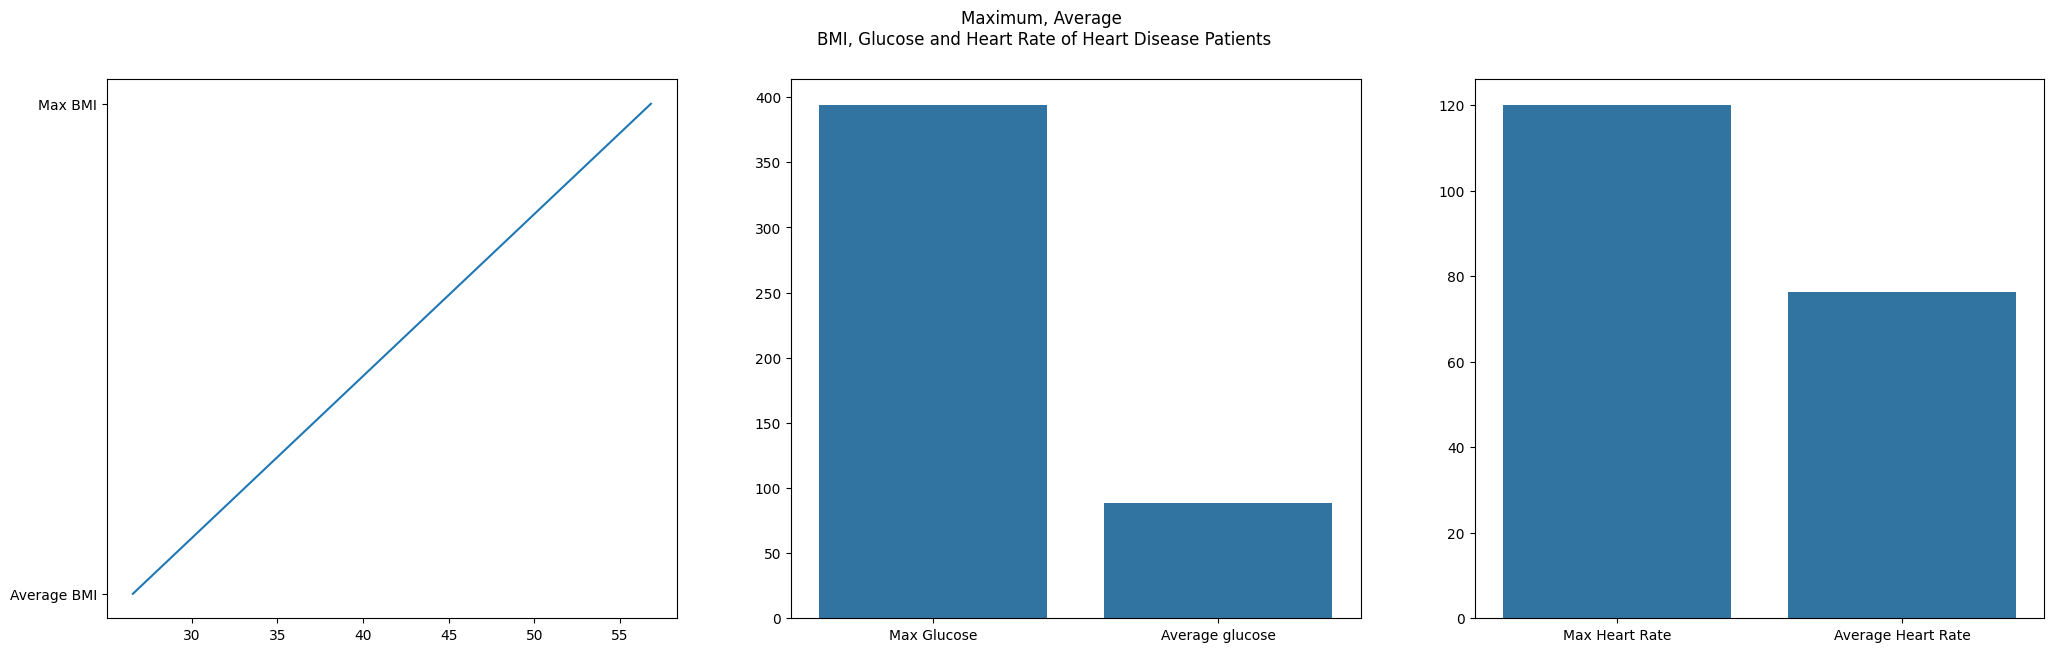

In [47]:
df_heart_disease = df_heart_disease[df_heart_disease["TenYearCHD"] == 1]

plt.figure(figsize=(25,7))
plt.suptitle("Maximum, Average \nBMI, Glucose and Heart Rate of Heart Disease Patients")

plt.subplot(1,3,1)
sns.lineplot(y=["Max BMI","Average BMI"] ,x= [np.max(list(df_heart_disease["BMI"])) ,np.average(list(df_heart_disease["BMI"]))])
plt.subplot(1,3,2)
sns.barplot(x=["Max Glucose","Average glucose"],y =[np.max(list(df_heart_disease["glucose"])) ,np.average(list(df_heart_disease["glucose"]))])
plt.subplot(1,3,3)
sns.barplot(x =["Max Heart Rate","Average Heart Rate"],y = [np.max(list(df_heart_disease["heartRate"])) ,np.average(list(df_heart_disease["heartRate"]))])
plt.show()

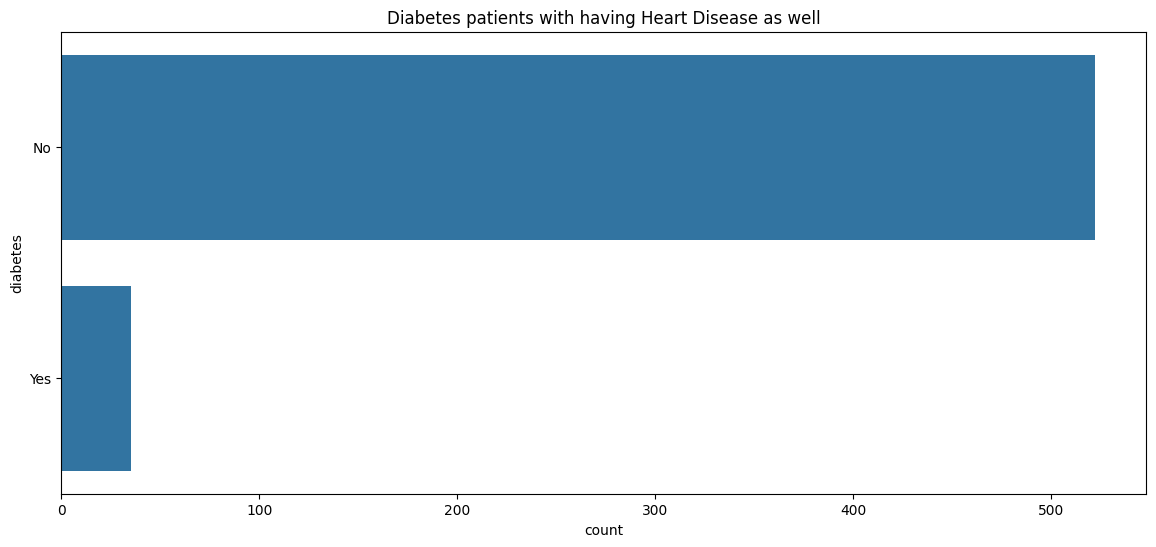

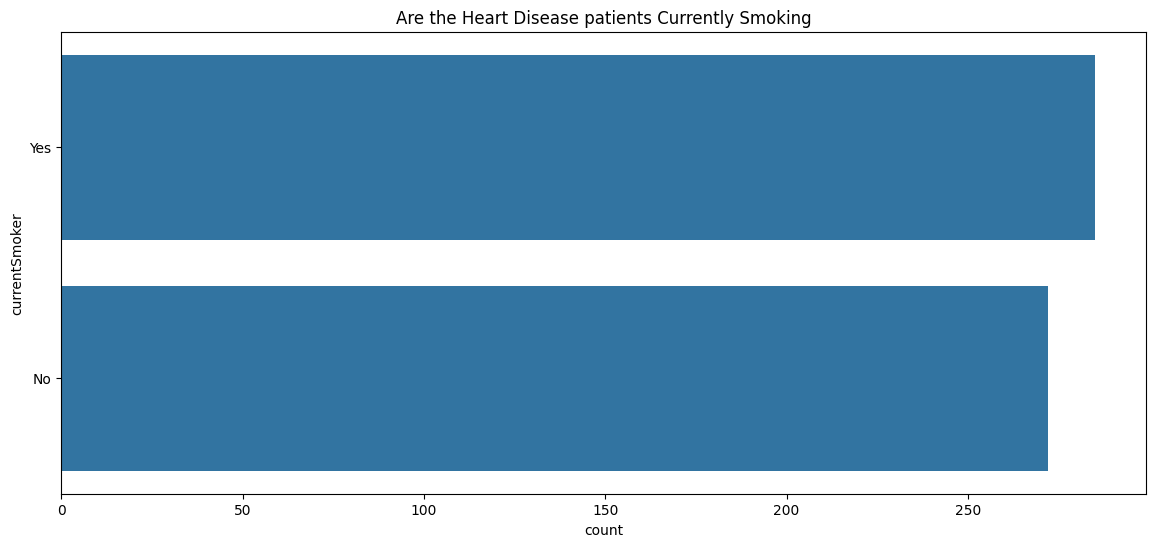

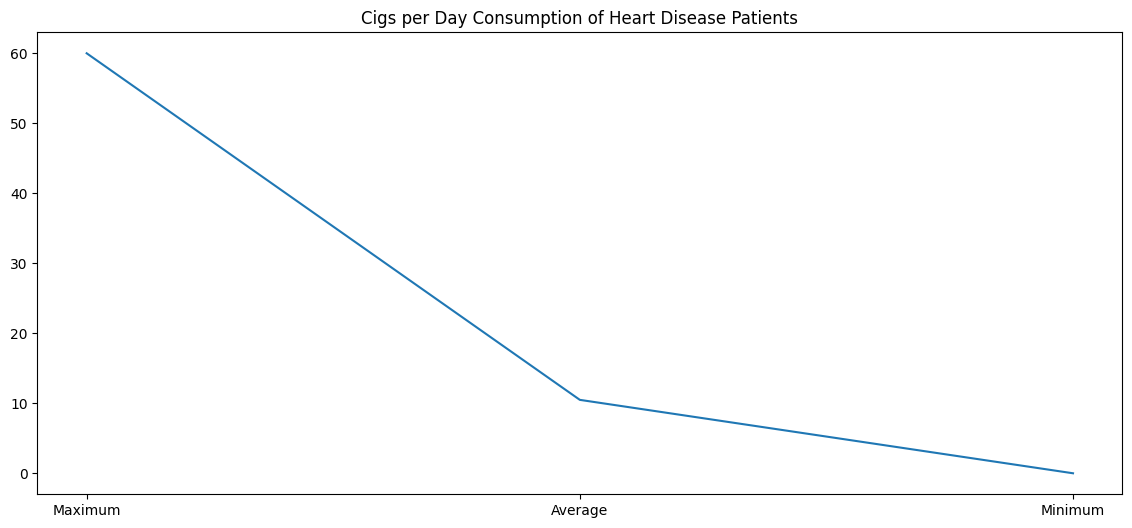

In [48]:
# Let us see that those patients who are classified as Heart Diseases Patient
# are they diabetes patients as well , are they current smoker or not and lastly what is the avg no of cig_per_day consumption of 
# heart disease patients

plt.figure(figsize=(14,6))
plt.title("Diabetes patients with having Heart Disease as well")
sns.countplot(df_heart_disease.diabetes.map({0:"No",1:"Yes"}))
plt.show()

plt.figure(figsize=(14,6))
plt.title("Are the Heart Disease patients Currently Smoking")
sns.countplot(df_heart_disease.currentSmoker.map({0:"No",1:"Yes"}))
plt.show()


plt.figure(figsize=(14,6))
plt.title("Cigs per Day Consumption of Heart Disease Patients")
sns.lineplot(y = [np.max(df_heart_disease.cigsPerDay),np.average(df_heart_disease.cigsPerDay),np.min(df_heart_disease.cigsPerDay)],x = ["Maximum","Average","Minimum"])
plt.show()



<Axes: >

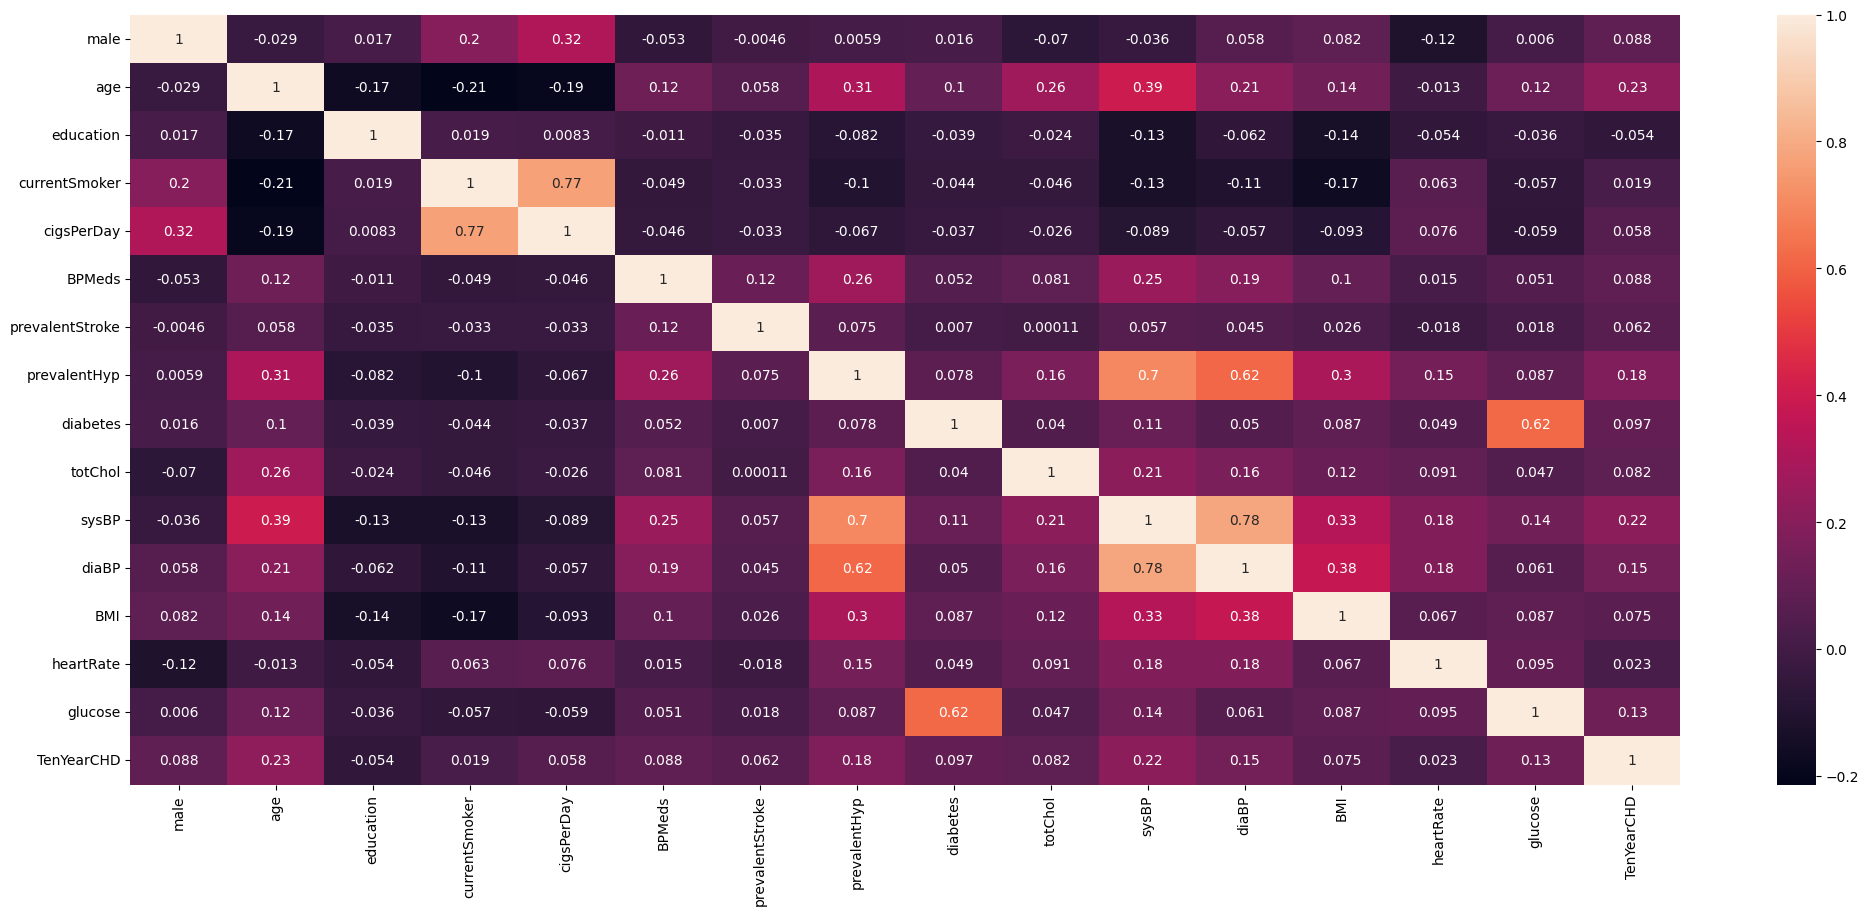

In [49]:
#Below are the Most relevant features for our model Training
corr_matrix = df_heart_disease_1.corr()


plt.figure(figsize=(25,10))
sns.heatmap(corr_matrix,annot=True)


Now on the basis of above correlation matrix we will perform feature Engineering and will select the best features 

for our Model training so we can get the best and accurate predictions

In [50]:


cor_target = corr_matrix["TenYearCHD"]
relevant_features = cor_target[(cor_target > 0) | (cor_target < 0)]

relevant_features = list(relevant_features.keys())[:-1]


In [51]:
print(f"Total No of Original Columns: {len(df_heart_disease_1.columns)}")
print(f"Total No of Selected Columns: {len(relevant_features)}")

Total No of Original Columns: 16
Total No of Selected Columns: 15


Now on the basis of above analysis we have the columns to keep and the columns to discard

In [52]:
df_heart_disease_1 = df_heart_disease_1.dropna()


y = df_heart_disease_1['TenYearCHD']
X = df_heart_disease_1[relevant_features]

pd.Series(y).value_counts()


TenYearCHD
0    3101
1     557
Name: count, dtype: int64

In [53]:
smote = SMOTE(random_state=42)
X,y = smote.fit_resample(X, y)
pd.Series(y).value_counts()


TenYearCHD
0    3101
1    3101
Name: count, dtype: int64

In [ ]:
# Now Splitting the Data

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

Now in Below section we are Applying **Random Forest Model** developing our first Model and then will predict the test data and check how accurate our Model is Working

In [55]:
# Now Training our Random Forest Classification
 
Random_Forest_model = RandomForestClassifier()

Random_Forest_model.fit(X_train,y_train)
y_pred = Random_Forest_model.predict(X_test)


### **Evaluation of Our Model No 1:**

In [56]:
acc_model1 = (accuracy_score(y_test,y_pred)*100)

print("The Accuracy of our Model 1 is :",acc_model1,"%")

The Accuracy of our Model 1 is : 89.87749838813669 %


<Axes: >

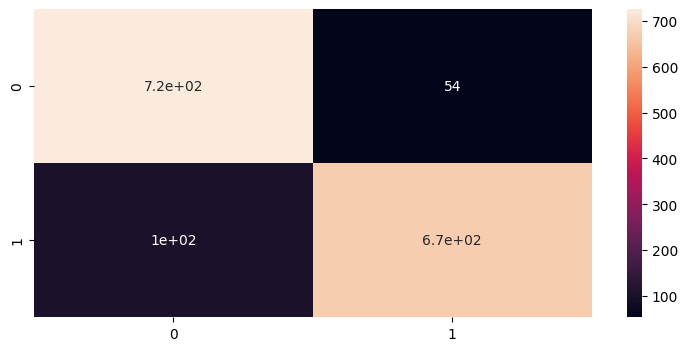

In [57]:

plt.figure(figsize=(9,4))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [58]:
# Now here we will get our classification report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90       779
           1       0.93      0.87      0.89       772

    accuracy                           0.90      1551
   macro avg       0.90      0.90      0.90      1551
weighted avg       0.90      0.90      0.90      1551



Now in Below section we are Applying **KNN Model** developing our second Model and then will predict the test data and check how accurate our Model is Working

In [59]:
## Creating Model No 2 i.e of KNN Classification Model

from sklearn.neighbors import KNeighborsClassifier

# Now Training our Random Forest Classification
 
knn_model = KNeighborsClassifier()

knn_model.fit(X_train,y_train)
y_pred_knn = knn_model.predict(X_test)

acc_model2 = (accuracy_score(y_test,y_pred_knn)*100)

print("The Accuracy of our Model 2 is :",acc_model2,"%")


The Accuracy of our Model 2 is : 81.1089619600258 %


In [60]:
# Now here we will get our classification report

print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.94      0.66      0.78       779
           1       0.74      0.96      0.83       772

    accuracy                           0.81      1551
   macro avg       0.84      0.81      0.81      1551
weighted avg       0.84      0.81      0.81      1551

